# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar a base de dados
previsao_renda = pd.read_csv('previsao_de_renda.csv')

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

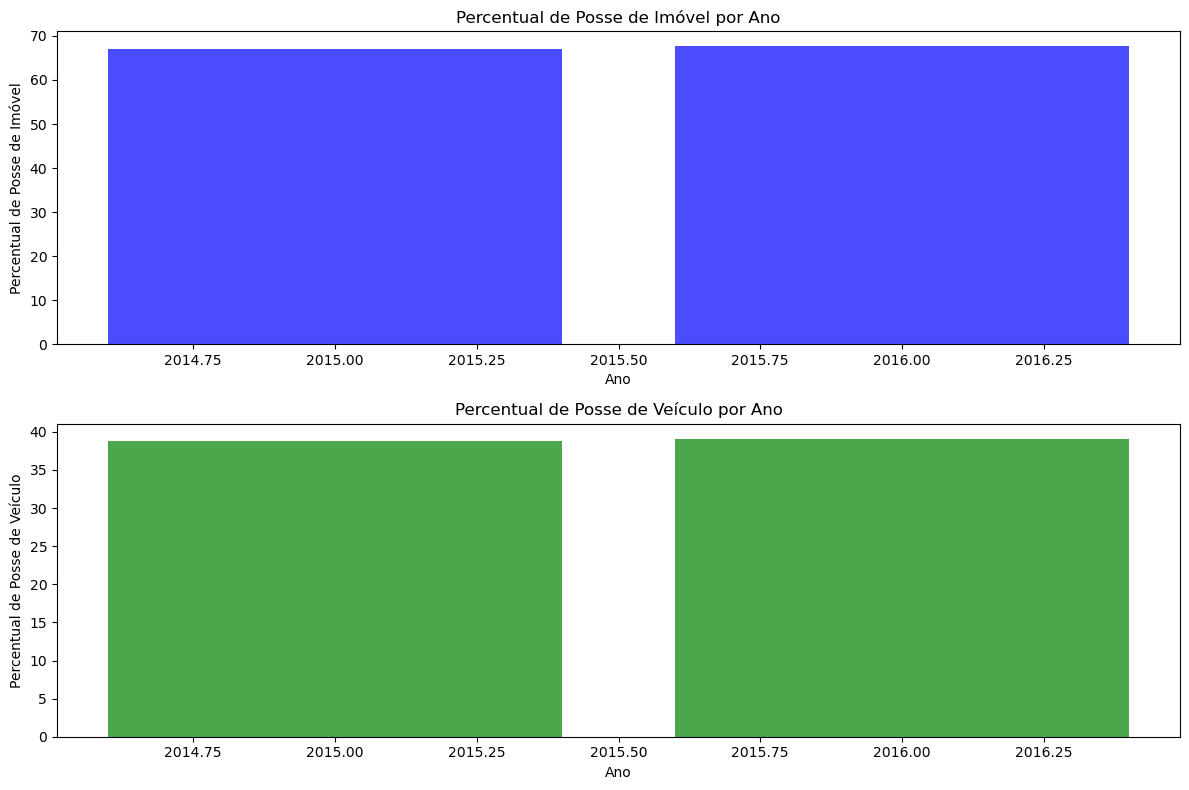

In [17]:
# Extrair o ano da coluna 'data_ref'
previsao_renda['ano'] = pd.to_datetime(previsao_renda['data_ref']).dt.year

# Agrupar por ano e calcular a porcentagem de posse de imóvel e veículo
posse_imovel_ano = previsao_renda.groupby('ano')['posse_de_imovel'].mean() * 100
posse_veiculo_ano = previsao_renda.groupby('ano')['posse_de_veiculo'].mean() * 100

# Criar o gráfico de barras
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico de posse de imóvel
ax[0].bar(posse_imovel_ano.index, posse_imovel_ano, color='blue', alpha=0.7)
ax[0].set_title('Percentual de Posse de Imóvel por Ano')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Percentual de Posse de Imóvel')

# Gráfico de posse de veículo
ax[1].bar(posse_veiculo_ano.index, posse_veiculo_ano, color='green', alpha=0.7)
ax[1].set_title('Percentual de Posse de Veículo por Ano')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Percentual de Posse de Veículo')

plt.tight_layout()
plt.show()

**Não há uma mudança significativa tanto na posse de imóveis por ano, quanto a de veículos, porém em ambos os gráficos podemos observar um leve crescimento de ambas váriaveis.**

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

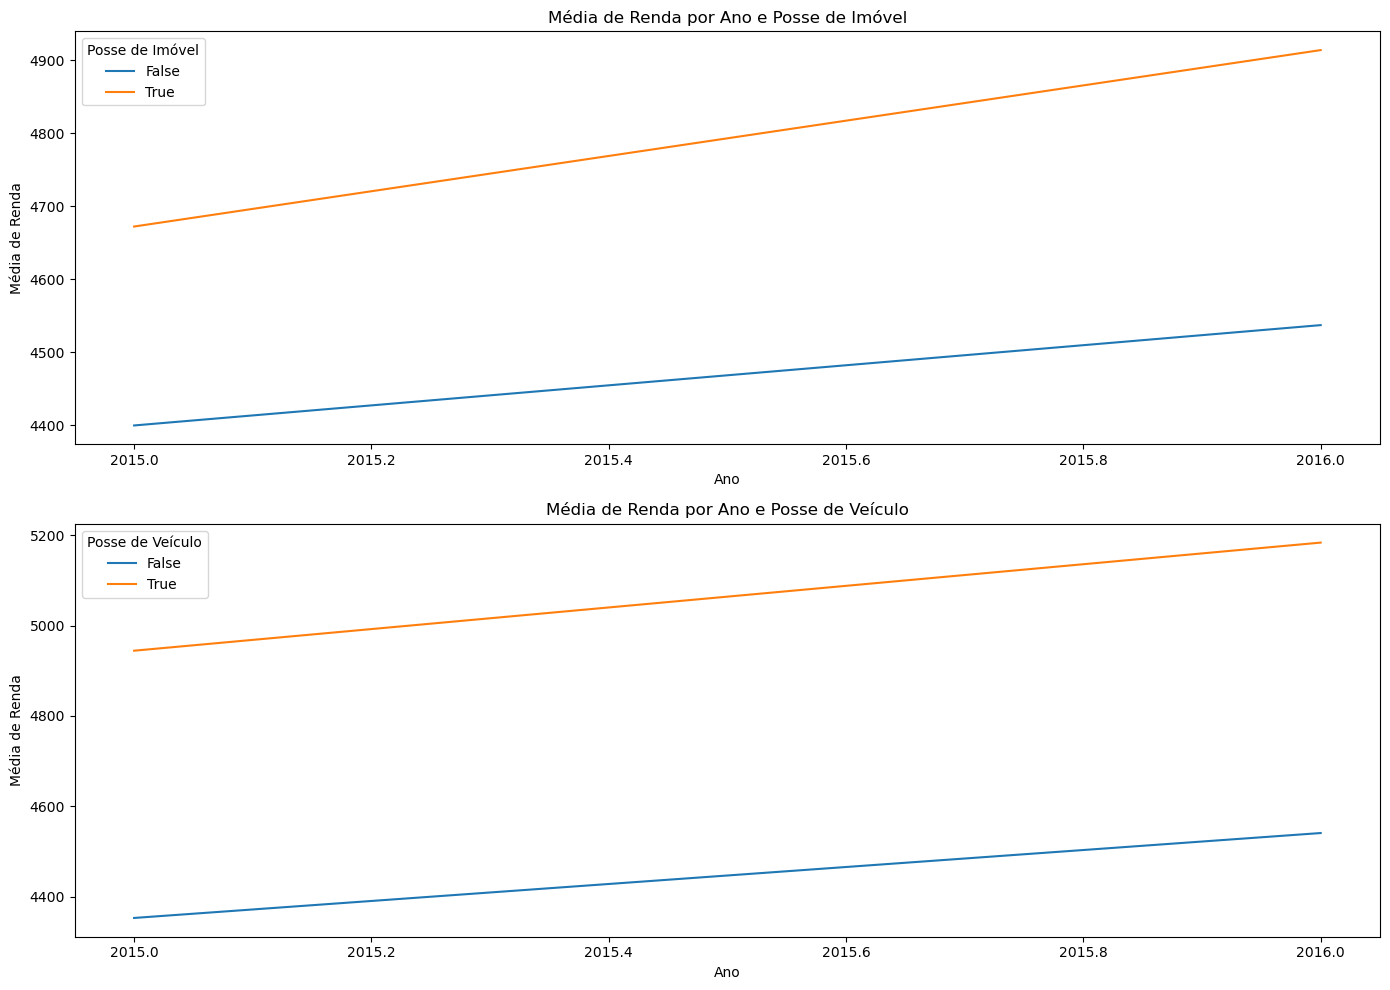

In [22]:
# Extrair o ano da coluna 'data_ref'
previsao_renda['ano'] = pd.to_datetime(previsao_renda['data_ref']).dt.year

# Agrupar por ano e calcular as médias de renda para cada nível das variáveis qualitativas
media_renda_posse_imovel = previsao_renda.groupby(['ano', 'posse_de_imovel'])['renda'].mean().reset_index()
media_renda_posse_veiculo = previsao_renda.groupby(['ano', 'posse_de_veiculo'])['renda'].mean().reset_index()

# Criar os gráficos de linha
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico de média de renda por posse de imóvel
sns.lineplot(x='ano', y='renda', hue='posse_de_imovel', data=media_renda_posse_imovel, ax=ax[0])
ax[0].set_title('Média de Renda por Ano e Posse de Imóvel')
ax[0].set_xlabel('Ano')
ax[0].set_ylabel('Média de Renda')
ax[0].legend(title='Posse de Imóvel')

# Gráfico de média de renda por posse de veículo
sns.lineplot(x='ano', y='renda', hue='posse_de_veiculo', data=media_renda_posse_veiculo, ax=ax[1])
ax[1].set_title('Média de Renda por Ano e Posse de Veículo')
ax[1].set_xlabel('Ano')
ax[1].set_ylabel('Média de Renda')
ax[1].legend(title='Posse de Veículo')

plt.tight_layout()
plt.show()

**Ambos os gráficos demonstram que as variáveis qualitativas se mantêm em crescimento, tanto para aqueles que possuem imóveis/veículos quanto para o inverso. É possível observar com clareza que não há alterações significativas, o que indica um crescimento estável.**

**Quanto ao uso dessas variáveis em modelagem, acredito que elas poderiam ser utilizadas como preditores de futuros crescimentos, considerando a constância com que apresentam esse crescimento, especialmente pela ausência de dados discrepantes ou que quebrem o padrão observado.**